# 6G Network
User location is a crucial piece of information for 6G
network management and control. In real world, location uncertainty in mmWave networks is unavoidable and leads to localization errors. Image processing aided 6G systems show much improved performance by reducing location uncertainty. The goal is to design computationally light-weight fast localizer of 3 geographical locations: building=1, grass=2 and road=3, as shown in the image below.

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

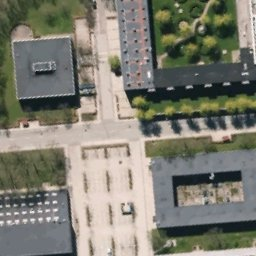

In [15]:
path = '/content/location.png'
img = cv2.imread(path)
cv2_imshow(img)

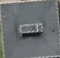

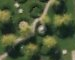

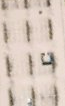

In [16]:
"""manually extracting different regions from the image"""
building = img[38:96,13:73,:]
cv2_imshow(building)
grass = img[0:60,160:235,:]
cv2_imshow(grass)
road = img[150:256,80:145,:]
cv2_imshow(road)

In [18]:
def feature_space(img,b=0,g=1,r=2):
  """extracting features using channel differencing"""
  feature_space = []
  R_G_img = abs(np.sum(img[:,:,r].astype(int)-img[:,:,g].astype(int))/(img.size/3))
  feature_space.append(R_G_img)
  R_B_img = abs(np.sum(img[:,:,r].astype(int)-img[:,:,b].astype(int))/(img.size/3))
  feature_space.append(R_B_img)
  G_B_img = abs(np.sum(img[:,:,g].astype(int)-img[:,:,b].astype(int))/(img.size/3))
  feature_space.append(G_B_img)
  twoG_R_B_img = abs(np.sum(2*img[:,:,g].astype(int)-img[:,:,r].astype(int)-img[:,:,b].astype(int))/(img.size/3))
  feature_space.append(twoG_R_B_img)
  return feature_space

In [19]:
print(feature_space(building))
print(feature_space(grass))
print(feature_space(road))

[4.0183908045977015, 5.749425287356321, 1.7310344827586206, 2.2873563218390807]
[11.264666666666667, 20.092, 31.356666666666666, 42.62133333333333]
[15.42801161103048, 26.59187227866473, 11.163860667634253, 4.264150943396227]


In [20]:
def output(path):
  img = cv2.imread(path)
  feature_input = feature_space(img,b=0,g=1,r=2)
  feature_building = [4.0183908045977015, 5.749425287356321, 1.7310344827586206, 2.2873563218390807]
  feature_grass = [11.264666666666667, 20.092, 31.356666666666666, 42.62133333333333]
  feature_road = [15.42801161103048, 26.59187227866473, 11.163860667634253, 4.264150943396227]
  mse_building = np.square(np.subtract(feature_input,feature_building)).mean()
  mse_grass = np.square(np.subtract(feature_input,feature_grass)).mean()
  mse_road = np.square(np.subtract(feature_input,feature_road)).mean()
  if(mse_building<mse_grass and mse_building<mse_road):
    return 'Building'
  if(mse_grass<mse_building and mse_grass<mse_road):
    return 'Grass'
  else:
    return 'Road'

In [21]:
out = output('/content/location2.jpg')
print(out)

Grass
